In [29]:
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim


import torchvision

import matplotlib.pyplot as plt
import numpy as np

In [3]:
!mkdir data

In [173]:
dataset_all = torchvision.datasets.CIFAR10(
    root= "./data",
    train=True, 
    download=True,
    transform= torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])
)

Files already downloaded and verified


In [174]:
dataset = torch.utils.data.Subset(dataset_all, range(1000))

In [128]:
def plot_image(image: torch.Tensor):
    plt.imshow(image.cpu().permute(1, 2, 0).numpy())

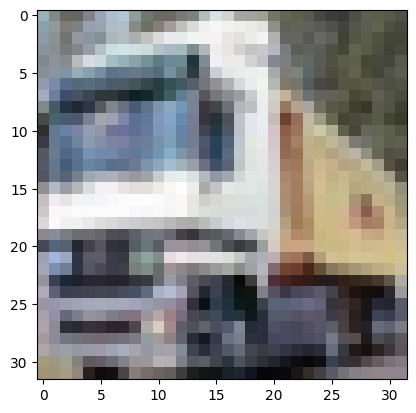

In [129]:
plot_image(dataset[1][0])

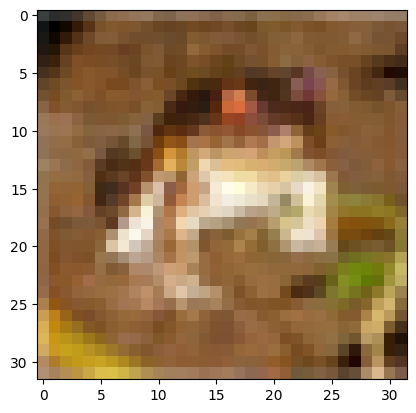

In [130]:
plot_image(dataset[0][0])

In [131]:
dataset

In [132]:
loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True
)

In [133]:
model = nn.Sequential(
    nn.Flatten(start_dim=-3),
    nn.Linear(3 * 32 * 32, 10)
)

In [134]:
model

Sequential(
  (0): Flatten(start_dim=-3, end_dim=-1)
  (1): Linear(in_features=3072, out_features=10, bias=True)
)

In [135]:
model(dataset[0][0])

tensor([ 0.0328, -0.2161,  0.1281, -0.6331, -0.4467,  0.0707, -0.1672,  0.2789,
         0.8912,  0.0807], grad_fn=<ViewBackward0>)

In [136]:
opt = optim.Adam(model.parameters(), lr=0.001)

In [184]:
for _ in range(100):

    total_loss = 0

    for img, lbl in loader:

        opt.zero_grad()

        out = model(img)

        loss = F.cross_entropy(out, lbl)

        loss.backward()

        total_loss += loss.item()

        opt.step()

    if _ % 10 == 0: print(f"Loss = {total_loss/len(loader)}")

Loss = 0.44934024289250374
Loss = 0.4241942260414362
Loss = 0.4034339766949415
Loss = 0.3933503348380327
Loss = 0.37205789238214493
Loss = 0.3624910656362772
Loss = 0.34979219548404217
Loss = 0.3446978610008955
Loss = 0.319409791380167
Loss = 0.3050269056111574


In [191]:
image_weight = model[1].weight[1].reshape(3, 32, 32).detach()
image_weight = (image_weight - image_weight.min() /(-image_weight.min() + image_weight.max()))

In [192]:
image_weight

tensor([[[0.6595, 0.6309, 0.7084,  ..., 0.5961, 0.5318, 0.6058],
         [0.5077, 0.5722, 0.6775,  ..., 0.5810, 0.5345, 0.5352],
         [0.3181, 0.5479, 0.5762,  ..., 0.5538, 0.5865, 0.5094],
         ...,
         [0.6739, 0.7380, 0.5732,  ..., 0.5608, 0.5833, 0.3638],
         [0.5951, 0.5446, 0.4553,  ..., 0.5031, 0.5277, 0.3173],
         [0.5092, 0.4177, 0.3627,  ..., 0.3592, 0.4658, 0.4207]],

        [[0.5420, 0.5420, 0.6340,  ..., 0.5937, 0.5255, 0.6067],
         [0.4149, 0.4753, 0.5644,  ..., 0.6015, 0.5446, 0.5258],
         [0.2370, 0.4616, 0.5101,  ..., 0.5966, 0.6308, 0.5579],
         ...,
         [0.6986, 0.7710, 0.6532,  ..., 0.6212, 0.6292, 0.4345],
         [0.5713, 0.5561, 0.5206,  ..., 0.5126, 0.5380, 0.3560],
         [0.5212, 0.4316, 0.3879,  ..., 0.3859, 0.5079, 0.4393]],

        [[0.4972, 0.5723, 0.6598,  ..., 0.5531, 0.5039, 0.5830],
         [0.3725, 0.4988, 0.5931,  ..., 0.5259, 0.5320, 0.5180],
         [0.1762, 0.4462, 0.4730,  ..., 0.5985, 0.6163, 0.

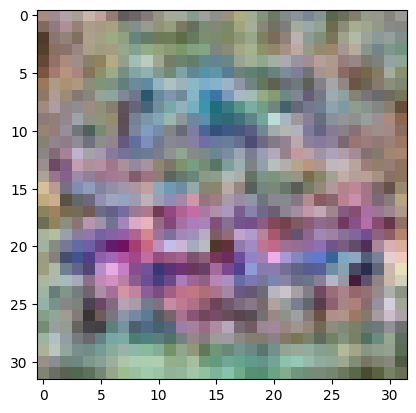

In [193]:
plot_image(image_weight)

In [194]:
dataset_all.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']